## Mean precipitation - pr

In [17]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy

import os
home = os.path.expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [18]:
from functions.myFuncs import *

### one dataset

In [19]:
variable = 'precip'

models = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

models_cmip6 =[
    # 'TaiESM1',        # 1 rcp monthly
    # 'BCC-CSM2-MR',    # 2 rcp monthly   
    # 'FGOALS-g3',      # 3 rcp 0463 - 0614
    # 'CNRM-CM6-1',     # 4 rcp 1850 - 1999
    # 'MIROC6',         # 5 rcp 3200 - 3340
    'MPI-ESM1-2-HR',  # 6 rcp 1850 - 2014
    # 'NorESM2-MM',     # 7 rcp 0001 - 0141
    # 'GFDL-CM4',       # 8 rcp 0001 - 0141 (gr2)
    # 'CanESM5',        # 9 rcp 1850 - 2000
    # 'CMCC-ESM2',      # 10 rcp monthly
    # 'UKESM1-0-LL',    # 11 rcp 1850 - 1999
    # 'MRI-ESM2-0',     # 12 rcp 1850 - 2000
    # 'CESM2',          # 13 rcp 0001 - 0990  (multiple fill values (check if all get converted to NaN), for historical)
    # 'NESM3',          # 14 rcp 1850 - 2014
        ]

observations = [
    # 'GPCP'
    ]

datasets = models + models_cmip6 + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85',
    # 'abrupt-4xCO2'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:precip, dataset:MPI-ESM1-2-HR, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 10957, lat: 22, lon: 128)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    precip   (time, lat, lon) float64 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/ba08a5dc-eaab-4cdf-bfbd-9fda6a961802

In [20]:
data = ds[variable]
data

<xarray.DataArray 'precip' (time: 10957, lat: 22, lon: 128)>
[30854912 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:    mm day⁻¹

In [21]:
has_nan = np.isnan(data).any()
print('characteristics')
print('hasNaN:', has_nan.data)
print('max', data.max().data)
print('min', data.min().data)
print('mean', data.mean().data)

characteristics
hasNaN: False
max 168.10539729227165
min 1.0886075569628559e-13
mean 3.385023891678821


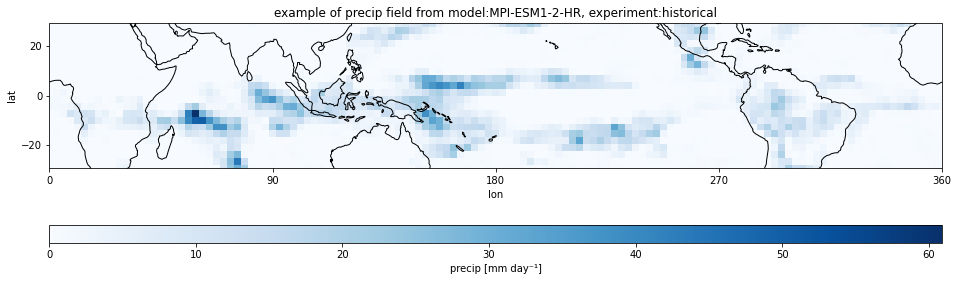

In [22]:
scene = data.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format(variable, datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

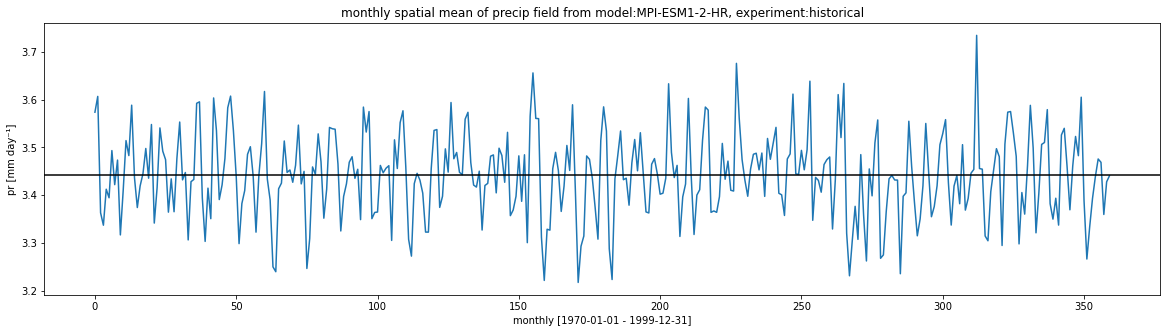

In [23]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

aWeights = np.cos(np.deg2rad(data.lat))
y= data.weighted(aWeights).mean(dim=('lat','lon'))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], variable, datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = 'pr [{}]'.format(data.units)


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

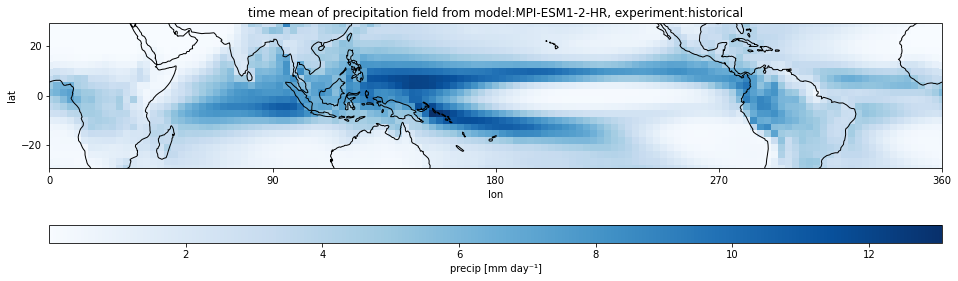

In [24]:
title = 'time mean of precipitation field from model:{}, experiment:{}'.format(datasets[0], experiments[0])
plot_scene(data.mean(dim='time', keep_attrs=True), cmap='Blues', title = title)

In [25]:
aWeights = np.cos(np.deg2rad(data.lat))
data.mean(dim='time', keep_attrs=True).weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True)

<xarray.DataArray 'precip' ()>
array(3.44168752)
Attributes:
    units:    mm day⁻¹

In [23]:
# run all above from this cell

### comparing datasets

In [24]:
variable = 'precip'

models = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

models_cmip6 =[
    'TaiESM1',        # 1 # rcp monthly
    'BCC-CSM2-MR',    # 2 # rcp monthly   
    'FGOALS-g3',      # 3 # rcp 0463 - 0614
    'CNRM-CM6-1',     # 4 # rcp 1850-1999
    'MIROC6',         # 5 # rcp 3200 - 3340
    'MPI-ESM1-2-HR',  # 6 # rcp 1850 - 2014
    'NorESM2-MM',     # 7 # rcp 0001 - 0141
    'GFDL-CM4',       # 8 # rcp 0001 - 0141 (gr2)
    'CanESM5',        # 9 # rcp 1850 - 2000
    'CMCC-ESM2',      # 10 # rcp monthly
    'UKESM1-0-LL',    # 11 # rcp 1850 - 1999
    'MRI-ESM2-0',     # 12 # rcp 1850 - 2000
    'CESM2',          # 13 # rcp 0001 - 0990  (multiple fill values (check if all get converted to NaN), for historical)
    'NESM3',          # 12 # rcp 1850-2014
        ]

observations = [
    # 'GPCP'
    ]

datasets = models + models_cmip6 + observations

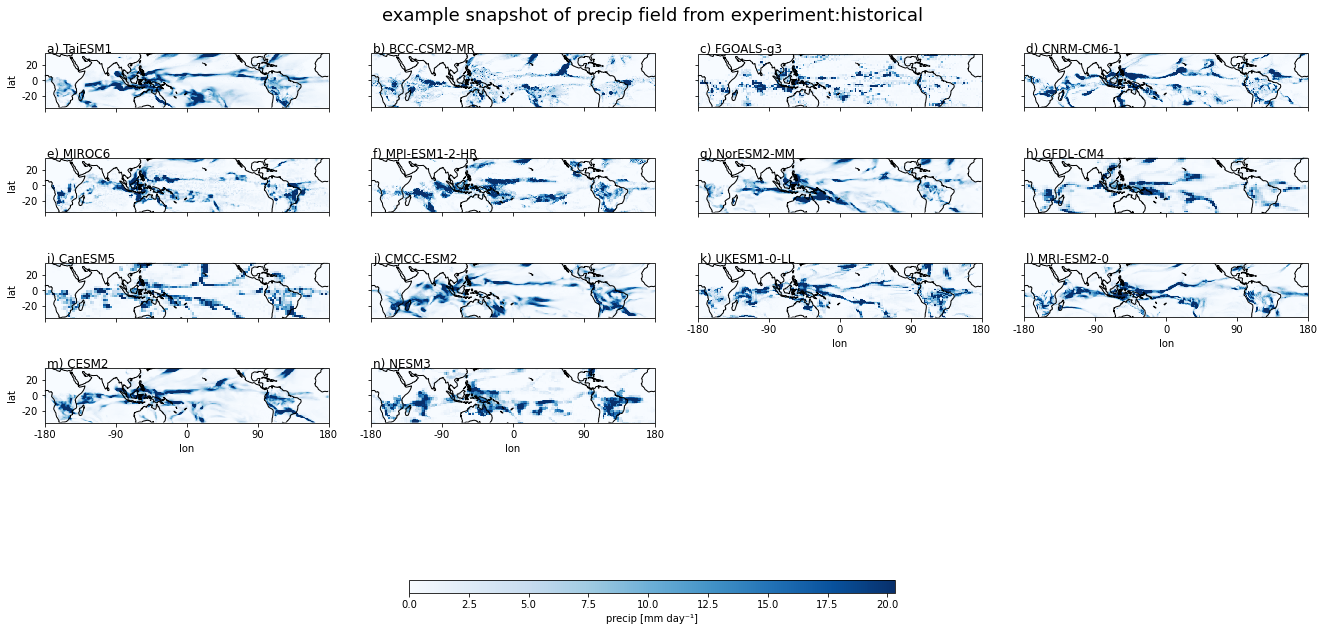

In [25]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable].isel(time=0)
        y= data
        
        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example snapshot of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_dsvariable(variable, dataset, experiments[0],resolution=resolutions[0])[variable].isel(time=0)
    y = data

    cmap = 'Blues'
    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('precip', y.units))

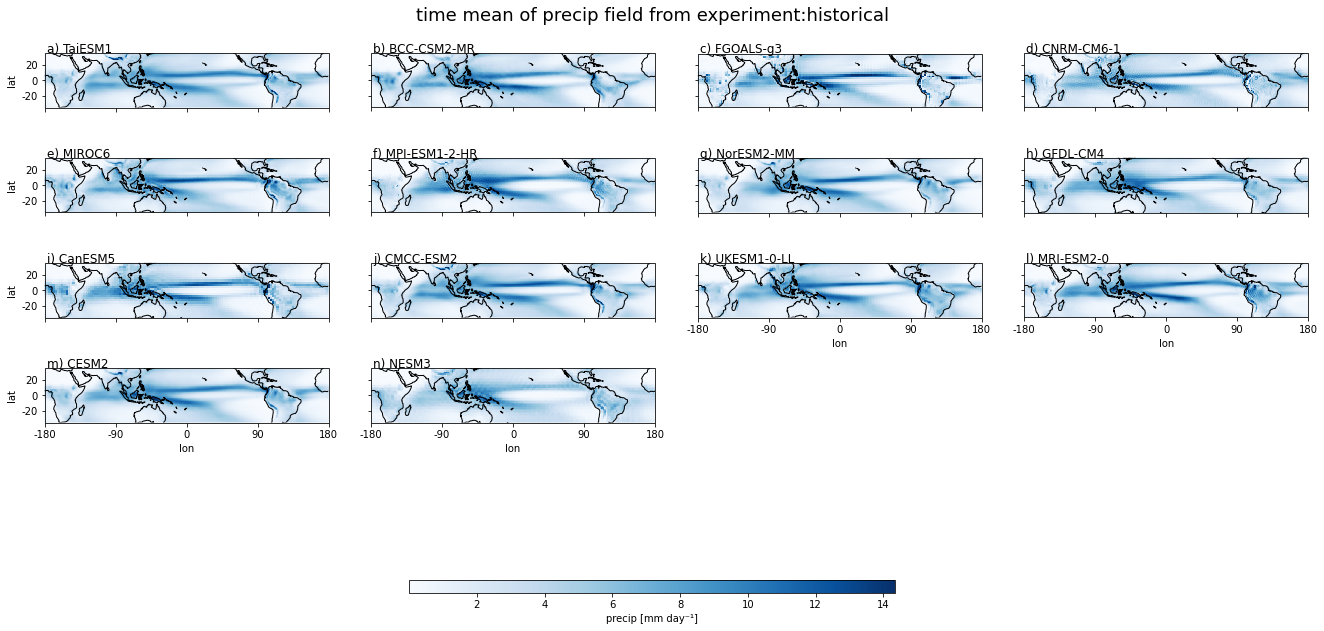

In [26]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.99
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        
        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
        y = data.mean(dim='time')

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'time mean of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
            
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    y = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable].mean(dim=('time'),keep_attrs=True)

    cmap = 'Blues'
    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format(variable, y.units))


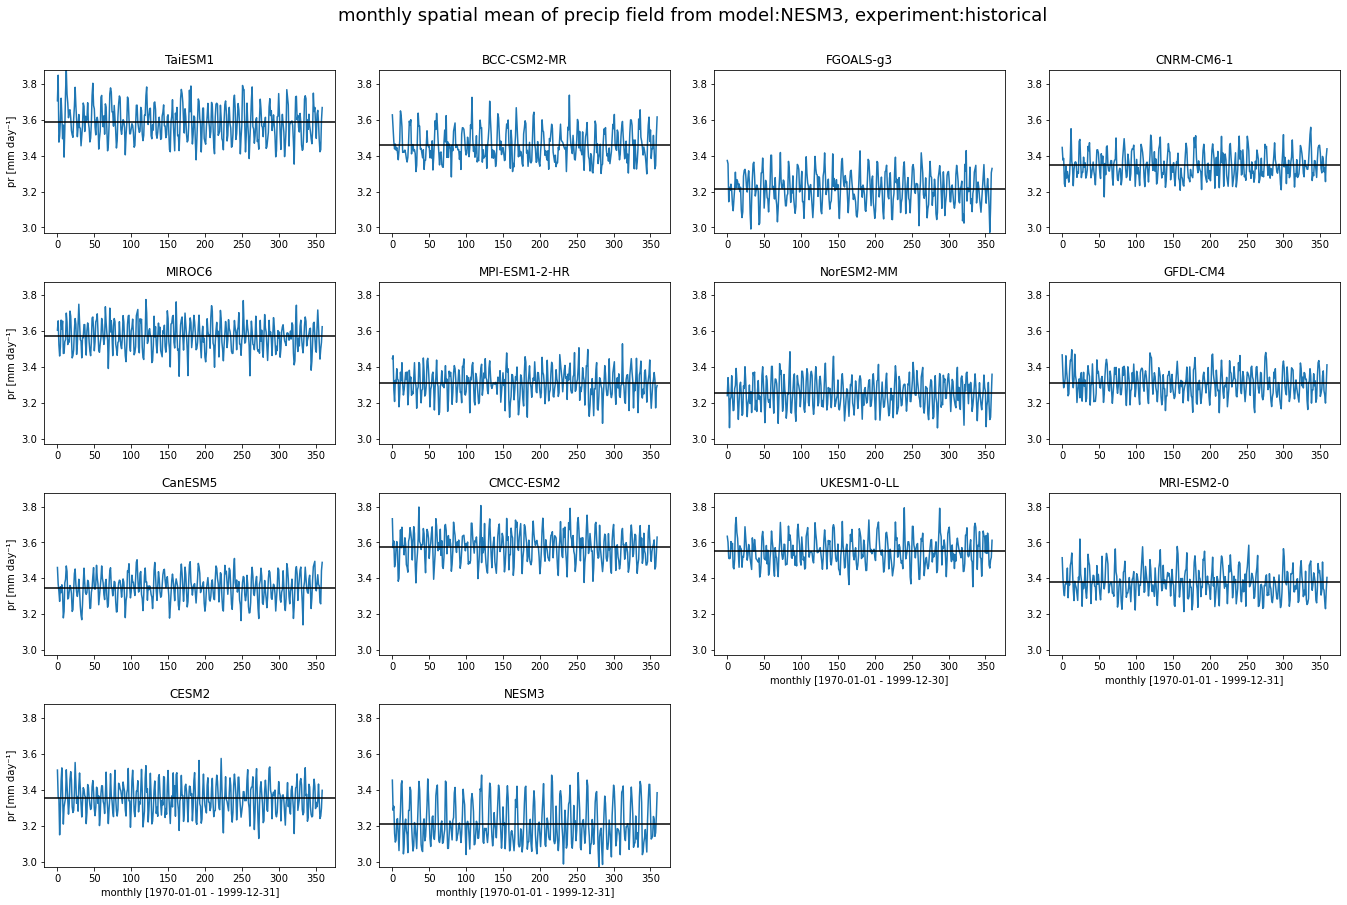

In [27]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('lat','lon'))

        if timeMean_options[0] == 'annual':
            y = y.resample(time='Y').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'seasonal':
            y = y.resample(time='QS-DEC').mean(dim="time")
            y = to_monthly(y)
            y = y.rename({'month':'season'})
            y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])
            y = y.isel(year=slice(1, None))

        if timeMean_options[0] == 'monthly':
            y = y.resample(time='M').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'daily':
            y = y

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], variable, dataset, experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
    aWeights = np.cos(np.deg2rad(data.lat))
    y= data.weighted(aWeights).mean(dim=('lat','lon'))

    title = dataset
    plot_timeseries(y, title=title, timeMean_option=timeMean_options, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'pr [{}]'.format(data.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

Text(0, 0.5, 'precip [mm day⁻¹]')

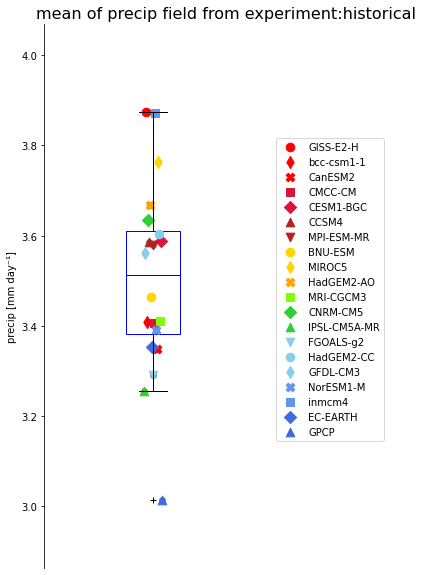

In [9]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC',     # 19
    'GPCP'          # 20
    ]

colors = [
    'red', 'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', 'gold', 'orange', # yellow
    'chartreuse', 'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']

order_by_tas = True
if order_by_tas:
    order_list = []
    for dataset in datasets:
        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            data = get_metric('tas_tMean', dataset, experiment=experiments[0], resolution=resolutions[0])['tas_tMean']
            aWeights = np.cos(np.deg2rad(data.lat))
            tas = data.weighted(aWeights).mean(dim=('lat','lon'))
            order_list = np.append(order_list, tas)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax  = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('time','lat','lon'))

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


plt.figure(figsize=(6.5,10))
title = 'mean of {} field from experiment:{}'.format(variable, experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
    aWeights = np.cos(np.deg2rad(data.lat))
    y_data = data.weighted(aWeights).mean(dim=('time','lat','lon'))

    y = np.append(y, y_data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
        
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('precip [{}]'.format('mm day' + chr(0x207B)+ chr(0x00B9)))

### Comparing datasets in a warmer climate

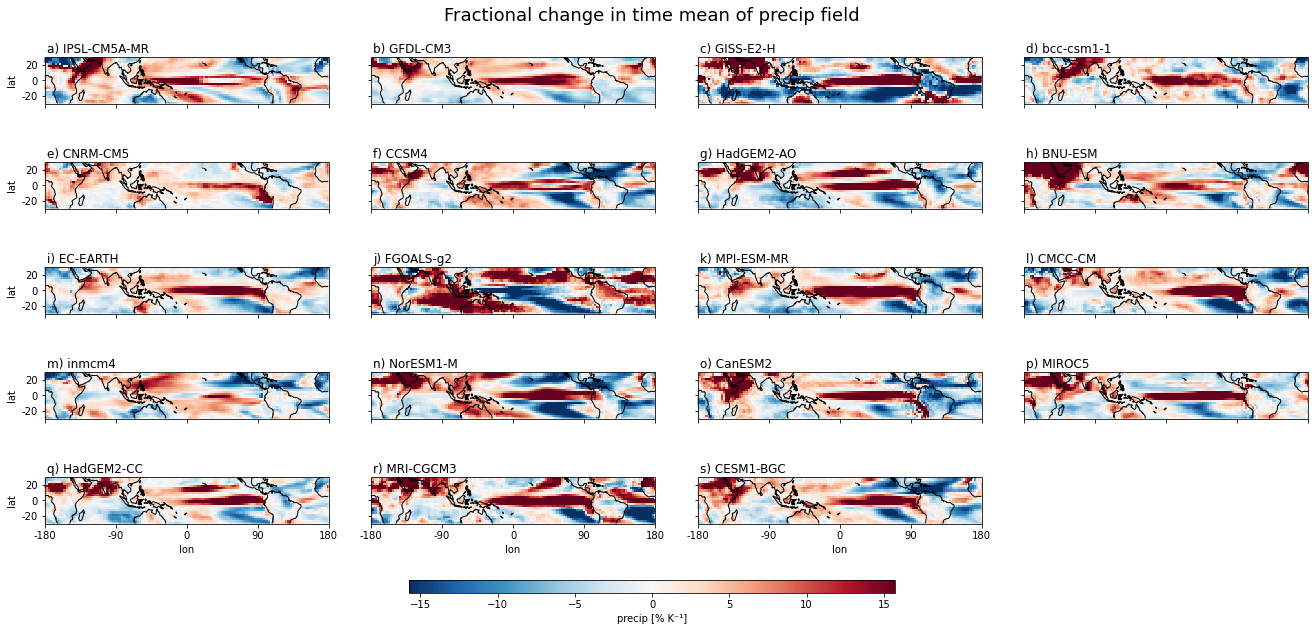

In [56]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        if dataset == 'GPCP':
            continue
        
        data_historical = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])[variable].mean(dim='time')
        data_rcp = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])[variable].mean(dim='time')
        aWeights = np.cos(np.deg2rad(data_historical.lat))

        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        
        datadiff = data_rcp - data_historical
        datadiff = (datadiff/data_historical)*100

        tasdiff = tas_rcp85 - tas_historical
        datadiff = datadiff/tasdiff

        y= datadiff

    vmin = np.append(vmin, np.quantile(y, quantile_low))
    vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Fractional change in time mean of {} field'.format(variable)

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
            
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    if dataset == 'GPCP':
        ax.remove()
        continue

    data_historical = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])[variable].mean(dim='time')
    data_rcp = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])[variable].mean(dim='time')
    aWeights = np.cos(np.deg2rad(data_historical.lat))

    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    
    datadiff = data_rcp - data_historical
    datadiff = (datadiff/data_historical)*100

    tasdiff = tas_rcp85 - tas_historical
    datadiff = datadiff/tasdiff

    y= datadiff
    cmap = 'RdBu_r'

    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=-vmax, vmax=vmax)
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])


plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('precip', '% K'+ chr(0x207B) + chr(0x00B9) )) # 'mm day' + chr(0x207B)+ chr(0x00B9)


Text(0, 0.5, 'precip [% K⁻¹]')

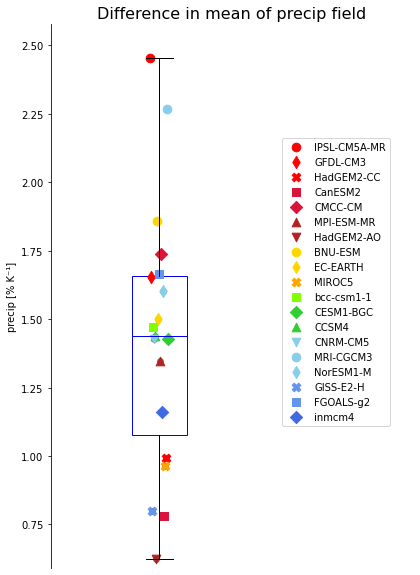

In [11]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

colors = [
    'red', 'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', 'gold', 'orange', # yellow
    'chartreuse', 'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']


order_by_tasdiff = True
if order_by_tasdiff:
    order_list = []
    for dataset in datasets:

        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            tas_historical = get_metric('tas_tMean', dataset, experiment='historical', resolution=resolutions[0])['tas_tMean']
            aWeights = np.cos(np.deg2rad(tas_historical.lat))

            tas_historical = get_metric('tas_tMean', dataset, experiment='historical', resolution=resolutions[0])['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85', resolution=resolutions[0])['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            tasdiff = tas_rcp - tas_historical
            order_list = np.append(order_list, tasdiff)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        if dataset == 'GPCP':
            continue
        
        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
        aWeights = np.cos(np.deg2rad(data.lat))
        data_historical = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])[variable].weighted(aWeights).mean(dim=('time','lat','lon'))
        data_rcp = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])[variable].weighted(aWeights).mean(dim=('time','lat','lon'))

        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

        datadiff = data_rcp - data_historical
        datadiff = (datadiff/data_historical)*100

        tasdiff = tas_rcp85 - tas_historical
        datadiff = datadiff/tasdiff

        y= datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 



plt.figure(figsize=(6.5,10))
title = 'Difference in mean of {} field'.format(variable)
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:

    if dataset == 'GPCP':
        continue

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
    aWeights = np.cos(np.deg2rad(data.lat))
    data_historical = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])[variable].weighted(aWeights).mean(dim=('time','lat','lon'))
    data_rcp = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])[variable].weighted(aWeights).mean(dim=('time','lat','lon'))

    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

    datadiff = data_rcp - data_historical
    datadiff = (datadiff/data_historical)*100

    tasdiff = tas_rcp85 - tas_historical
    datadiff = datadiff/tasdiff

    y = np.append(y, datadiff)
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()

    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('precip [{}]'.format('% K'+ chr(0x207B) + chr(0x00B9) )) # 'mm day' + chr(0x207B)+ chr(0x00B9)

In [58]:
# timeMean_options = [
#     # 'seasonal',
#     'monthly',
#     ]

# absolute_limits = True
# quantile_low = 0
# quantile_high = 1
# if absolute_limits:
#     vmin, vmax = [], []
#     for dataset in datasets:

#         data = get_dsvariable(variable, dataset, experiments[0])[variable]
#         aWeights = np.cos(np.deg2rad(data.lat))
#         y = data.weighted(aWeights).mean(dim=('lat','lon'))

#         if timeMean_options[0] == 'seasonal':
#             y = y.resample(time='QS-DEC').mean(dim="time")
#             y = to_monthly(y)
#             y = y.rename({'month':'season'})
#             y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])
#             y = y.isel(year=slice(1, None))
#             y= (y.mean(dim='year') - y.mean(dim='year').mean(dim='season'))

#         if timeMean_options[0] == 'monthly':
#             y = to_monthly(y)
#             y = y.assign_coords(month = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec'])
#             y= (y.mean(dim='year') - y.mean(dim='year').mean(dim='month'))

#         vmin = np.append(vmin, np.quantile(y, quantile_low))
#         vmax = np.append(vmax, np.quantile(y, quantile_high))

#     vmin = np.min(vmin)
#     vmax = np.max(vmax)

# else:
#     vmin, vmax = None, None 


# fig= plt.figure(figsize=(22.5,17.5))
# title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], variable, dataset, experiments[0])

# fig.suptitle(title, fontsize=18, y=0.95)

# for i, dataset in enumerate(datasets):
#     ax= fig.add_subplot(5,4,i+1)

#     ds = get_dsvariable(variable, dataset, experiments[0])
#     data = ds[variable]
#     aWeights = np.cos(np.deg2rad(data.lat))
#     y= data.weighted(aWeights).mean(dim=('lat','lon'))

#     title = dataset
#     plot_bar(y, timeMean_option=timeMean_options, title=title, ax=ax, ymin=vmin, ymax=vmax)
#     plt.xlabel('')
#     plt.ylim(vmin, vmax)

#     if (len(datasets)-i)<=4:
#         xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
#         plt.xlabel(xlabel)

#         if timeMean_options[0]=='seasonal':
#             plt.legend()

#     if i== 0 or i==4 or i==8 or i==12 or i==16:
#         ylabel = 'pr [{}]'.format(data.units)
#         plt.ylabel(ylabel)

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)